In [1]:
import canonical_toolkit as ctk

In [2]:
from rich.console import Console
console = Console()

In [3]:
node = ctk.create_root_node()
print(node)

node-object:C


In [4]:
node['left'] = ctk.create_brick_node(rotation=3)
node['right'] = ctk.create_hinge_node()
print(node)

node-object:C[l(B3)r(H)]


In [5]:
# try except this stuff here
# print(node['le'])
# print(node['l'])

In [6]:
node['left']['front'] = ctk.create_node('H', 2)
node['right']['front'] = ctk.create_hinge_node(1)

attachment = ctk.create_brick_node()
attachment['top'] = ctk.create_hinge_node()

node['le']['fr']['fr'] = attachment
print(node)

node-object:C[l(B3H2B[t(H)])r(HH1)]


In [7]:
graph = node.to_graph()

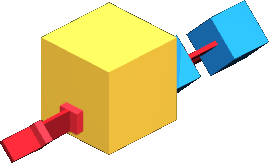

In [8]:
ctk.quick_view(node.to_graph())

node-object:B[t(H)]


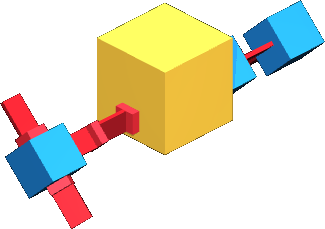

In [9]:
attachment_2 = attachment.copy()
print(attachment_2)
attachment_2['bottom'] = ctk.create_hinge_node(1)

node['right']['front']['front'] = attachment_2
ctk.quick_view(node.to_graph())

before


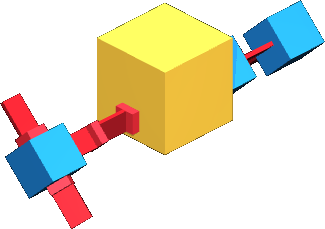

node-object:C[l(B3H2B[t(H)])r(HH1B[t(H)b(H1)])]


In [10]:
snapshot = node.copy()
print('before')
ctk.quick_view(snapshot.to_graph())
print(node)

after 1 rotation


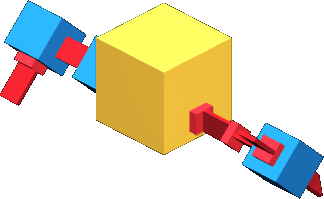

In [12]:
# try repeatedly pressing
print('after 1 rotation')
node.shift_visual_rotation(1)
ctk.quick_view(node.to_graph())

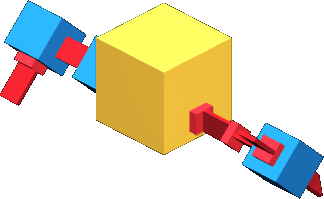

C[b(B3H2B[t(H)])f(HH1B[t(H)b(H1)])]


In [13]:
string = node.to_string()
ctk.quick_view(node.to_graph())
print(string)

In [14]:
node.canonicalize(limb_order=False)
canonical_string_1 = node.to_string()
print(canonical_string_1)

node.canonicalize(limb_order=True)
canonical_string_2 = node.to_string()
print(canonical_string_2)

C[b(B1HB[b(H)])f(HH1B[t(H)b(H1)])]
C[l(B1HB[b(H)])r(HH1B[t(H)b(H1)])]


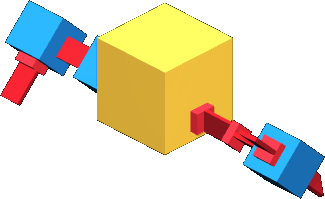

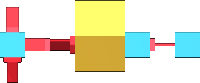

-----------------


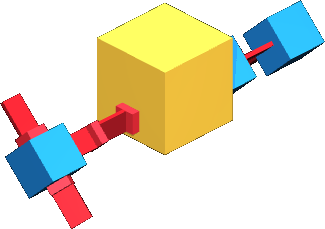

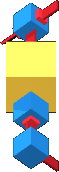

In [15]:
node2a = ctk.node_from_string(canonical_string_1)

node2b = ctk.node_from_string(canonical_string_2)
    
ctk.quick_view(node2a.to_graph())
ctk.quick_view(node2a.to_graph(), tilted=False)
print('-----------------')
ctk.quick_view(node2b.to_graph())
ctk.quick_view(node2b.to_graph(), tilted=False)

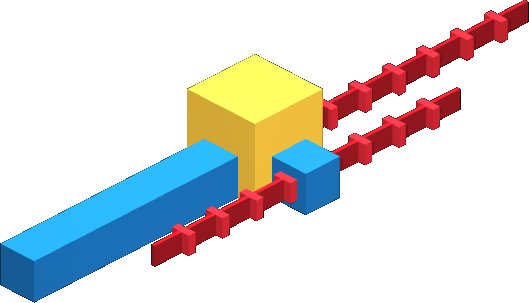

In [16]:
own_string_node = ctk.node_from_string("C[l(HHHHHHH)r(BBBBBB)f(B[l(HHHH)r(HHHH)])]")
ctk.quick_view(own_string_node.to_graph())

node-object:C[f(B2[rl(HHHH)])r(BBBBBB)l(HHHHHHH)]


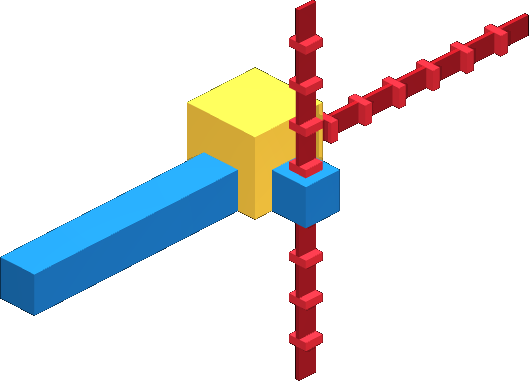

In [17]:
rotation = 2
own_string_node = ctk.node_from_string(f"C[l(HHHHHHH)r(BBBBBB)f(B{rotation}[l(HHHH)r(HHHH)])]")
print(own_string_node)
ctk.quick_view(own_string_node.to_graph())

node-object:C
node-object:BBBBBB


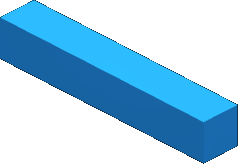

node-object:HHHHHHH


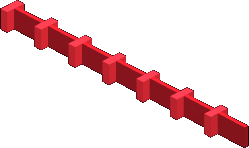

node-object:B2[rl(HHHH)]


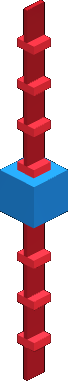

In [18]:
children = own_string_node.detatch_children()
print(own_string_node)

for child in children:
    print(child)
    ctk.quick_view(child.to_graph())

In [19]:
propellor_thing = children[2]
print(propellor_thing)

propellor_thing_child = propellor_thing['left']
print(child)

propellor_thing_child.detatch_from_parent()

print(propellor_thing)
print(propellor_thing_child)


node-object:B2[rl(HHHH)]
node-object:B2[rl(HHHH)]
node-object:B2[r(HHHH)]
node-object:HHHH


node-object:C[f(HHHH)]


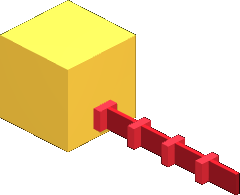

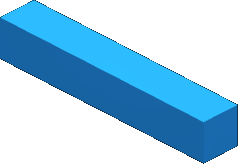

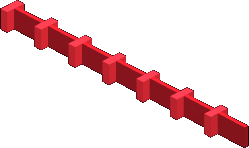

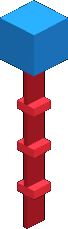

In [20]:
own_string_node['front'] = propellor_thing_child
print(own_string_node)
ctk.quick_view(own_string_node.to_graph())

for child in children:
    ctk.quick_view(child.to_graph())

---

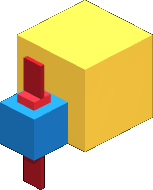

node-object:C[r(B[tb(H2)])]


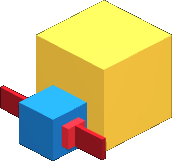

node-object:C[r(B[rl(H)])]


In [21]:
test1 = ctk.node_from_string('C[r(B2[r(H)l(H)])')

test2 = ctk.node_from_string('C[r(B4[r(H)l(H)])]')


ctk.quick_view(test1.to_graph())

print(test1.canonicalize())

ctk.quick_view(test2.to_graph())

print(test2.canonicalize())